##### Import the libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

##### Load the dataset

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
x_train.shape

(60000, 28, 28)

In [49]:
x_test.shape

(10000, 28, 28)

##### Explore the images

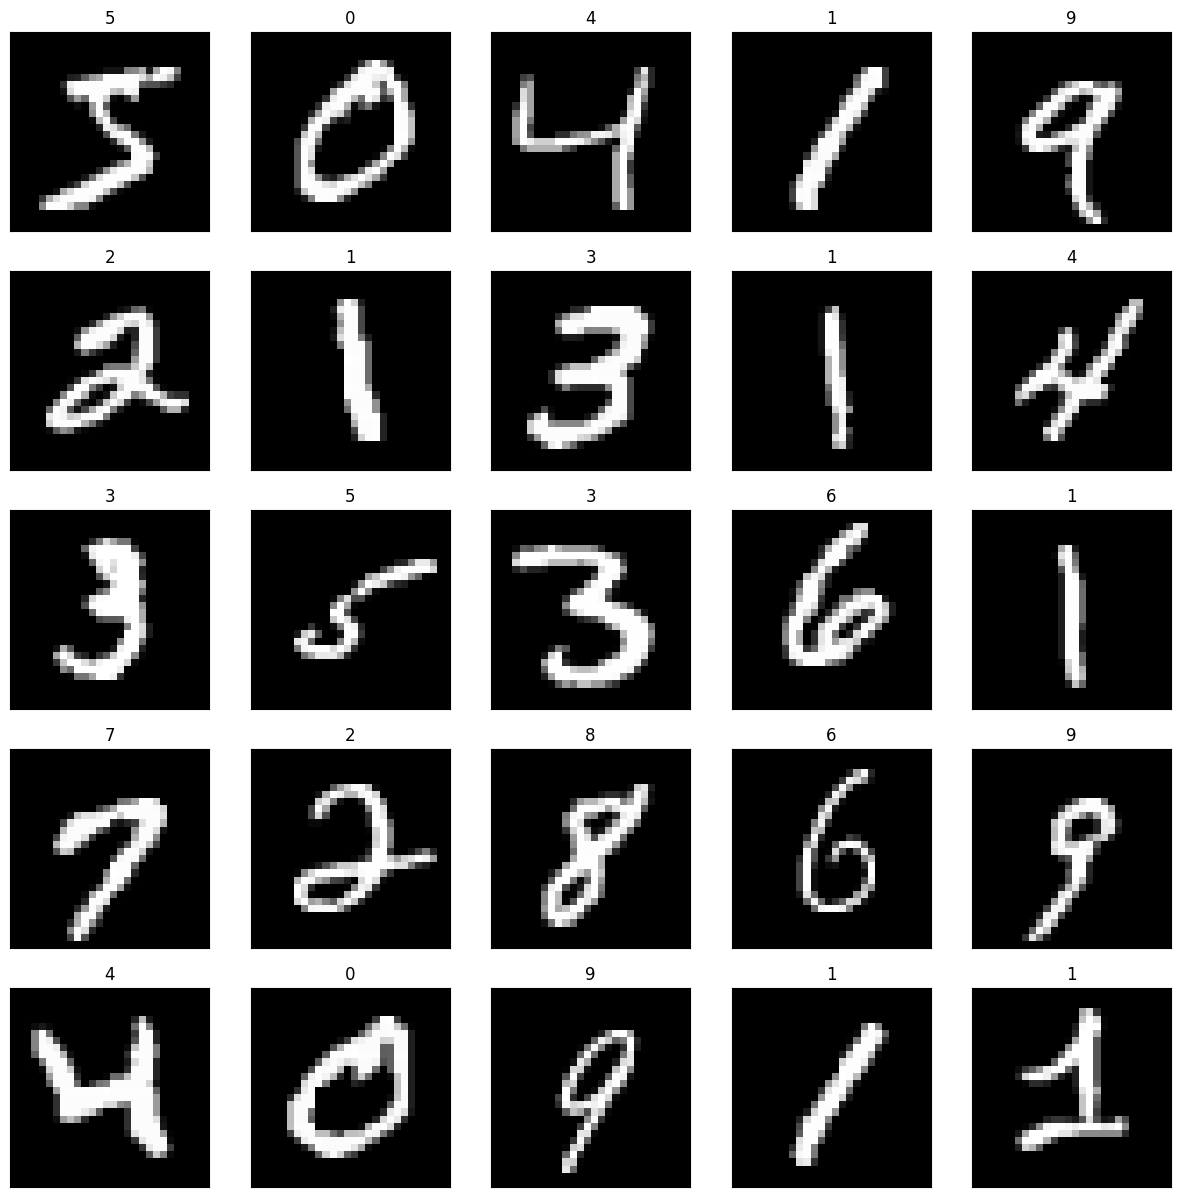

In [50]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap ='gray')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])

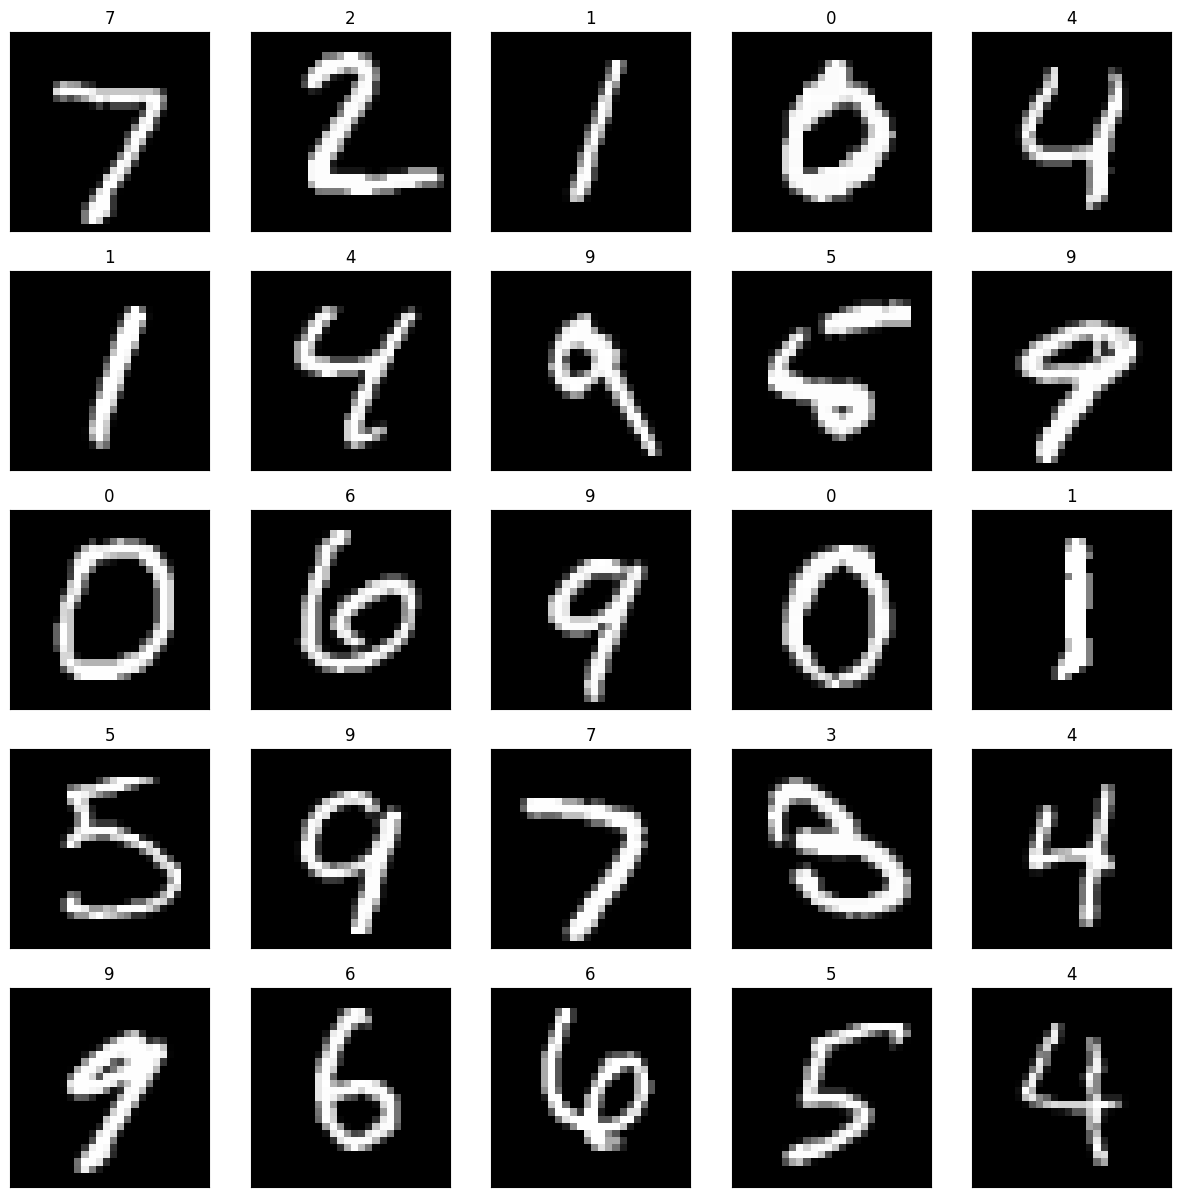

In [51]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i], cmap ='gray')
    plt.title(y_test[i])
    plt.xticks([])
    plt.yticks([])

##### Data Preparation

In [52]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [53]:
# normalize
x_train = x_train / 255
x_test = x_test / 255

In [54]:
# convert 2D to 1D
x_train[0].shape

(28, 28)

In [55]:
num = np.array([[5,6,7],[1,9,3]])

In [56]:
num

array([[5, 6, 7],
       [1, 9, 3]])

In [57]:
np.reshape(num, num.size)

array([5, 6, 7, 1, 9, 3])

In [58]:
num.reshape(-1)

array([5, 6, 7, 1, 9, 3])

In [59]:
num.flatten()

array([5, 6, 7, 1, 9, 3])

In [60]:
temp = x_train.flatten()

In [61]:
temp.shape

(47040000,)

In [62]:
temp = x_train.reshape(-1, x_train[0].size)

In [63]:
temp.shape

(60000, 784)

In [64]:
x_train = x_train.reshape(-1, x_train[0].size)
x_test = x_test.reshape(-1, x_test[0].size)

In [65]:
x_train.shape

(60000, 784)

In [66]:
x_test.shape

(10000, 784)

##### Prepare the output variable

In [67]:
import seaborn as sns

<Axes: xlabel='count'>

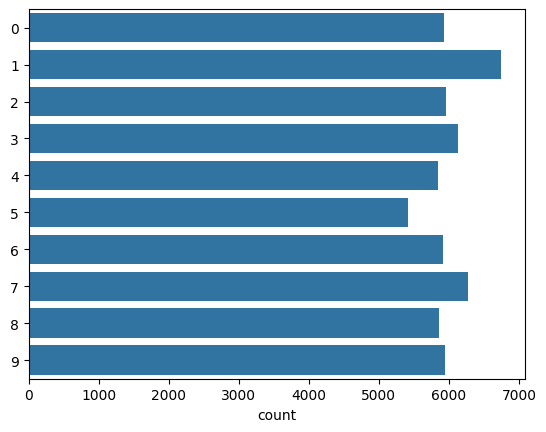

In [68]:
sns.countplot(y = y_train)

In [69]:
y_train.shape

(60000,)

In [70]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [71]:
y_train_new.shape

(60000, 10)

In [72]:
y_test_new.shape

(10000, 10)

In [73]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

##### Build the model

In [74]:
model = Sequential()

# input layer
model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu'))

# Hidden layers
model.add(Dense(256, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [75]:
from tensorflow.keras.utils import plot_model

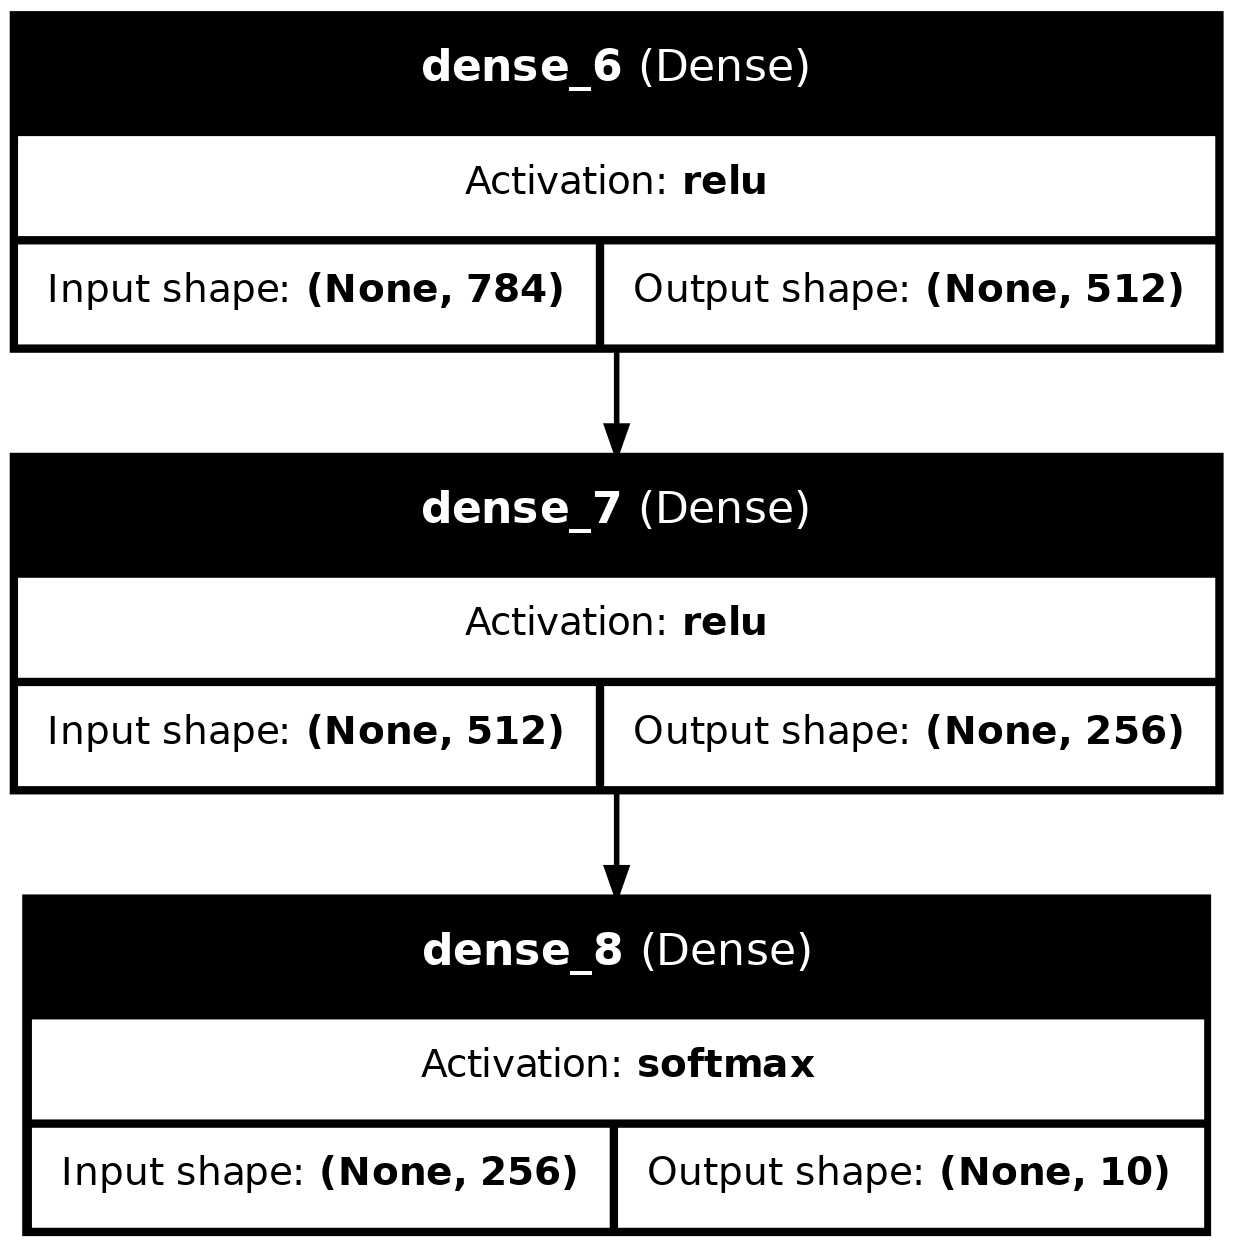

In [76]:
plot_model(model, show_layer_activations=True, show_shapes=True,
          show_layer_names=True)

In [77]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

##### Compile the model

In [78]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

##### Train the model

In [79]:
history = model.fit(x_train, y_train_new, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9077 - loss: 0.2996
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9713 - loss: 0.0919
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9816 - loss: 0.0615
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9847 - loss: 0.0475
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9873 - loss: 0.0419
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9896 - loss: 0.0362
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9902 - loss: 0.0327
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9909 - loss: 0.0331
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9917 - loss: 0.0295
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9930 - loss: 0.0260


##### Evaluate the model

In [81]:
model.evaluate(x_test, y_test_new, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9720 - loss: 0.1776


[0.14568178355693817, 0.9771999716758728]

In [84]:
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()

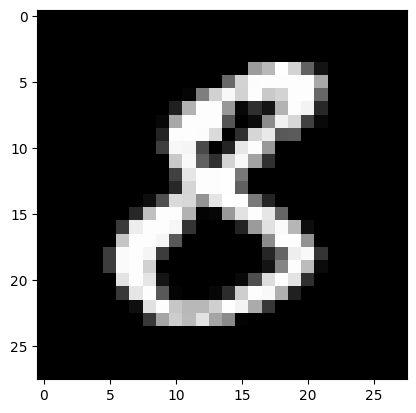

In [85]:
new = x_te[1234]
plt.imshow(new, cmap='gray')

In [87]:
new = new.reshape(1,784)
new = new / 255
probs = model.predict(new, verbose=False)
print(probs.argmax())

8


##### Prediction on unknown data

In [88]:
# Download the new-char.png file from 
# https://mitu.co.in/dataset  ---> images folder
# Predict the letter present in it

In [90]:
import cv2

In [104]:
img = cv2.imread('images/new-char.png',0)

In [105]:
img_new = cv2.resize(img, (28,28))

In [106]:
new = img_new.reshape(1,784)
new = new / 255
probs = model.predict(new, verbose=False)
print(probs.argmax())

2


In [107]:
img = cv2.imread('images/new-char1.jpg',0)

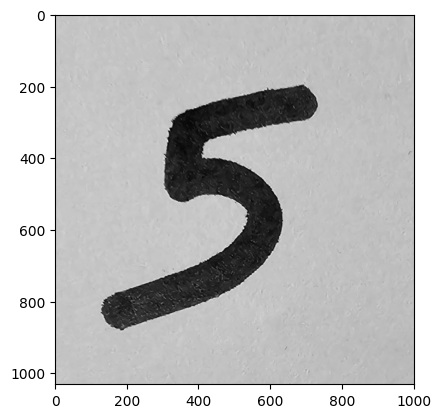

In [108]:
plt.imshow(img, cmap = 'gray')

In [109]:
thresh, img_thresh = cv2.threshold(img, 100,255, cv2.THRESH_BINARY_INV)

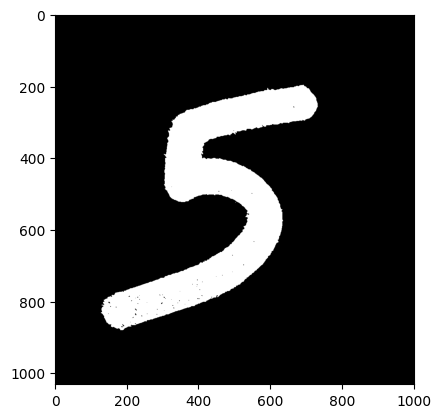

In [110]:
plt.imshow(img_thresh, cmap = 'gray')

In [101]:
img_new = cv2.resize(img_thresh, (28,28))

In [102]:
new = img_new.reshape(1,784)
new = new / 255
probs = model.predict(new, verbose=False)
print(probs.argmax())

5
